
-----------------------------------------------------------------------------------------

## Introduction
- This notebook will apply the raw datasets from hw1 and merge the csv files of our group members Suwen JIN 22205419 and Peijin JIANG 22202041.
- Each model will be a supervised learning model and the output will be a binary classification. 

This homework will be broken down into 4 main parts:
1. We will review the dataset from homework one and decide on which features to use to build our model
2. We will create a Linear Regression model and analyse
3. We will create a Logistical Regression model and analyse
4. We will create a Random Forest model and analyse
5. We will then try to optimized each model  

## (1) Data Understanding and Prep

#### read the cleaned and new features csv
according to hw1, we have added 3 features, case_month_quarter, high_cases_state, senior_yn

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

df = pd.read_csv('covid19-cdc-22202041_and_22205419_1-3_cleaned_new_features.csv')
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,current_status,symptom_status,hosp_yn,death_yn,case_month_quarter,high_cases_state,senior_yn
0,2021-08,KY,21.0,JEFFERSON,21111.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,Laboratory-confirmed case,Symptomatic,Yes,Yes,3rd,No,Yes
1,2021-11,MO,29.0,Unknown,Unknown,65+ years,Female,White,Non-Hispanic/Latino,0.0,Laboratory-confirmed case,Symptomatic,Unknown,Yes,4th,No,Yes
2,2020-07,FL,12.0,PALM BEACH,12099.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,Laboratory-confirmed case,Symptomatic,Yes,Yes,3rd,Yes,Yes
3,2020-11,KS,20.0,RENO,20155.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,Laboratory-confirmed case,Symptomatic,Yes,Yes,4th,No,Yes
4,2021-09,AZ,4.0,MARICOPA,4013.0,50 to 64 years,Male,White,Hispanic/Latino,0.0,Laboratory-confirmed case,Symptomatic,Yes,Yes,3rd,No,No


In [145]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                    object
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
current_status                      object
symptom_status                      object
hosp_yn                             object
death_yn                            object
case_month_quarter                  object
high_cases_state                    object
senior_yn                           object
dtype: object

#### Convert datatypes for plotting later
We will now review the datatypes and convert if needed. This will help avoid plotting errors later in the notebook
- The target feature "death_yn" is type object, with values "Yes" & "No". These will be mapped 'Yes': 1, "No": 0 and stored as "int64"
- Some features "state_fips_code" & "case_positive_specimen_interval" are float64 type. These will be converted to "int64" without losing any information as the values were little inflenced by the decimal places.

In [146]:
# convert riskperformance to 0,1
df['death_yn'] = df['death_yn'].map({'Yes': 1, "No": 0})
# convert floats to ints
df['state_fips_code'] = df['state_fips_code'].astype(
    'int64')
df['case_positive_specimen_interval'] = df['case_positive_specimen_interval'].astype(
    'int64')

In [147]:
df.dtypes

case_month                         object
res_state                          object
state_fips_code                     int64
res_county                         object
county_fips_code                   object
age_group                          object
sex                                object
race                               object
ethnicity                          object
case_positive_specimen_interval     int64
current_status                     object
symptom_status                     object
hosp_yn                            object
death_yn                            int64
case_month_quarter                 object
high_cases_state                   object
senior_yn                          object
dtype: object

In [148]:
df.isna().sum()


case_month                         0
res_state                          0
state_fips_code                    0
res_county                         0
county_fips_code                   0
age_group                          0
sex                                0
race                               0
ethnicity                          0
case_positive_specimen_interval    0
current_status                     0
symptom_status                     0
hosp_yn                            0
death_yn                           0
case_month_quarter                 0
high_cases_state                   0
senior_yn                          0
dtype: int64

we don't need to deal with Nah values because the data was cleaned and converted in hw1 successfully.

#### Setup Column types
We will now setup the continuous, categorical, target features

##### Select all categorical columns and convert to categorical type
 - This will be needed later when it will be required to convert categorical features into dummy features for modeling

In [149]:
# Select columns containing categorical data
# These colums were chosen as categories because
# there data contains single or multiple digit values each representing a different meaning
# rather than they can be shown as a numerical and continuous values.
# So they can't be continuous.
categorical_columns = df[['case_month', 'res_state', 'state_fips_code', 'res_county', 'county_fips_code', 'age_group', 'sex', 'race',
                          'ethnicity', 'current_status', 'symptom_status', 'hosp_yn', 'death_yn', 'case_month_quarter','high_cases_state','senior_yn']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
df.dtypes


case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval       int64
current_status                     category
symptom_status                     category
hosp_yn                            category
death_yn                           category
case_month_quarter                 category
high_cases_state                   category
senior_yn                          category
dtype: object

##### Setup continuous columns as all the remaining columns that are not category i.e. they are int64

In [150]:
continuous_columns = df.select_dtypes(['int64']).columns
df[continuous_columns].dtypes

case_positive_specimen_interval    int64
dtype: object

##### Finally set the target feature "death_yn" to int64 
- death_yn is a categorical feature but it is also the target feature
- To allow continuous features to plot against the target, it will need to be int64 type
- We will also remove it from the list of categorical columns

In [151]:
# convert "death_yn" to int64
df['death_yn'] = df['death_yn'].astype('int64')
# categorical_columns are now....
categorical_columns = df[['case_month', 'res_state', 'state_fips_code', 'res_county', 'county_fips_code', 'age_group', 'sex', 'race',
                          'ethnicity', 'current_status', 'symptom_status', 'hosp_yn', 'case_month_quarter','high_cases_state','senior_yn']].columns

Current status of data types

In [152]:
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval       int64
current_status                     category
symptom_status                     category
hosp_yn                            category
death_yn                              int64
case_month_quarter                 category
high_cases_state                   category
senior_yn                          category
dtype: object

##### The dataset will now be split into two datasets: 70% training and 30% test
- First we will set the target feature "y" to be death yes or no
- Then we will set "X" to be the remaining features in the dataframe i.e. we drop "death_yn" from the dataframe

In [153]:
y = pd.DataFrame(df["death_yn"])
X = df.drop(["death_yn"],1)

/var/folders/55/shjzwzfd201dbvts5qjkvwhh0000gn/T/ipykernel_87597/562390082.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop(["death_yn"],1)


##### The data set can now be split
- The train test split will randomly split the dataset as per the test size
- We will set the random state=1 to allow the random shuffle to be repeated within this notebook only

In [154]:
from sklearn.model_selection import train_test_split
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

print("original range is: ",df.shape[0])
print("training range (70%):\t rows 0 to", round(X_train.shape[0]))
print("test range (30%): \t rows", round(X_train.shape[0]), "to", round(X_train.shape[0]) + X_test.shape[0])

original range is:  35932
training range (70%):	 rows 0 to 25152
test range (30%): 	 rows 25152 to 35932


The dataset is now ready for plotting

## 1.2 On the training set we will now carry out a series of plots comparing all features to help make decisions on what features to keep for the model 

- All plots will be using the training subset of dataset: X_train, y_train

### 1.2.1 Plot the correlations between all the continuous features. 
- This data only has one continuous features case_positive_specimen_interval

### 1.2.2 Plot interaction between continuous features and target feature
- Since we just a pair of continuous feature and target feature, we just calculate yhe correlation with 'case_positive_specimen_interval', 'death_yn'.
- death_yn needs to be an int for these scatter plots, as we have prepared earlier

In [155]:
df[['case_positive_specimen_interval', 'death_yn']].corr().values[0,1]

-0.006857492489347606

<Axes: xlabel='case_positive_specimen_interval', ylabel='death_yn'>

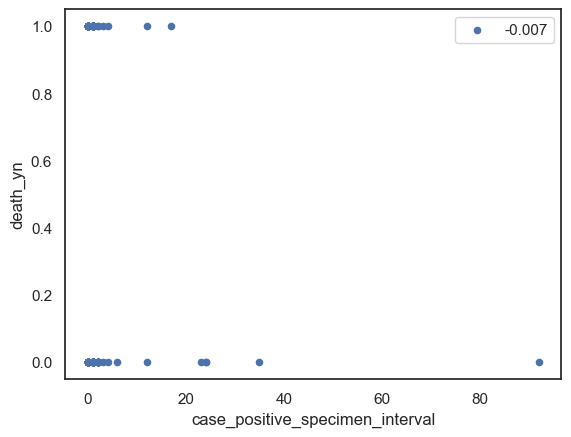

In [156]:
# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
df.plot(kind='scatter', x='case_positive_specimen_interval', y='death_yn', label="%.3f" %
        df[['case_positive_specimen_interval', 'death_yn']].corr().values[0, 1])


#### 1.2.3 Interpretation of the results
A correlation coefficient of -0.007 indicates a very weak negative correlation between 'case_positive_specimen_interval' and 'death_yn'. This means that there is a slight tendency for lower values of 'death_yn' to occur with slightly higher values of 'case_positive_specimen_interval', and vice versa, but this relationship is very weak and not considered statistically significant.

However, correlation does not imply causation, so this weak correlation alone does not provide evidence that 'case_positive_specimen_interval' directly causes or predicts 'death_yn'. 

## 1.3 Plot interaction between categorical features and target feature
- Here we will plot a pairwise interaction between each categorical feature against the target feature. 
- We will discuss what we observe from these plots, e.g., which categorical features seem to be better at predicting the target feature...
- We will choose a subset of categorical features we find promising (if any) and justify our choice.

Here we have 15 categorical features
- case_month                         category
- res_state                          category
- state_fips_code                    category
- res_county                         category
- county_fips_code                   category
- age_group                          category
- sex                                category
- race                               category
- ethnicity                          category
- current_status                     category
- symptom_status                     category
- hosp_yn                            category
- case_month_quarter                 category
- high_cases_state                   category
- senior_yn                          category

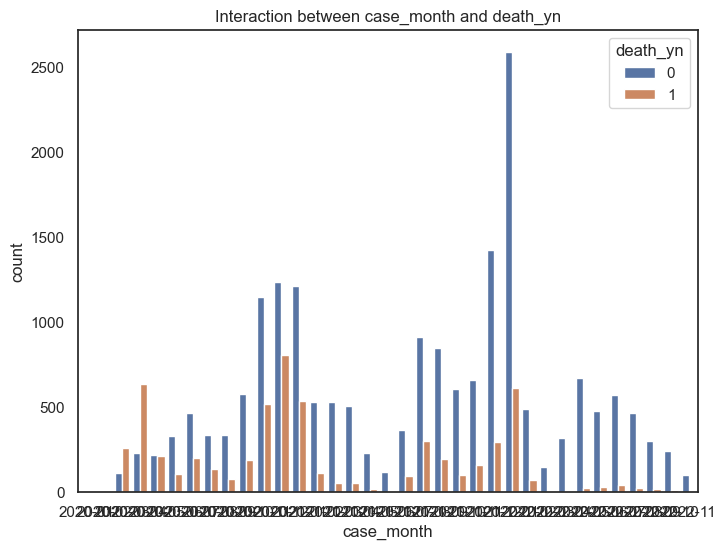

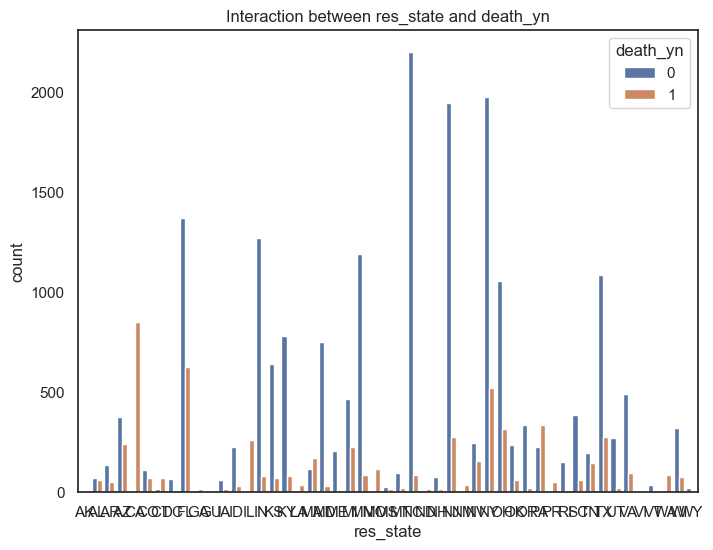

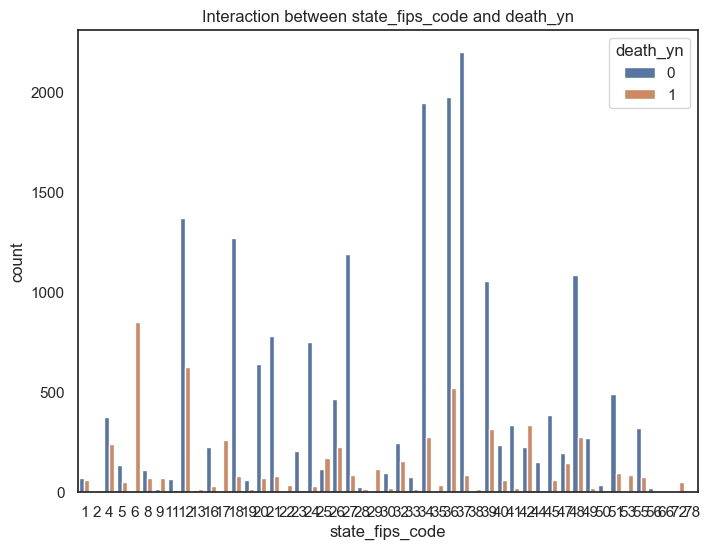

/Users/shizuku/opt/anaconda3/envs/comp30830/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


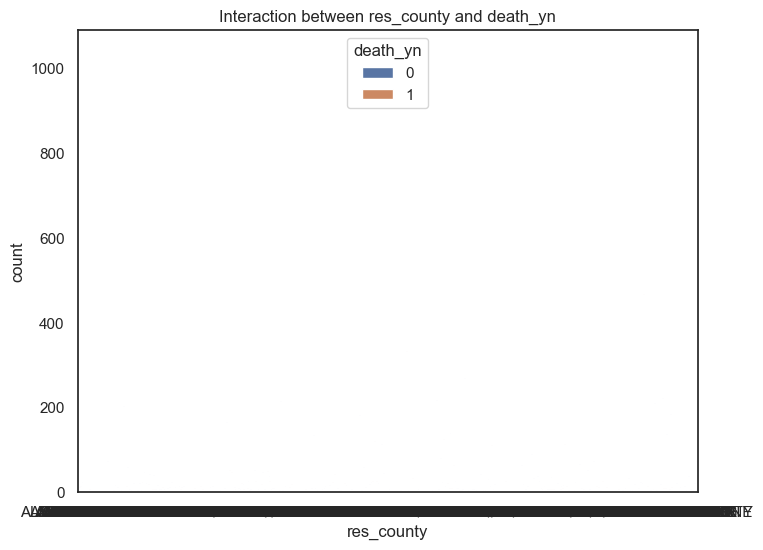

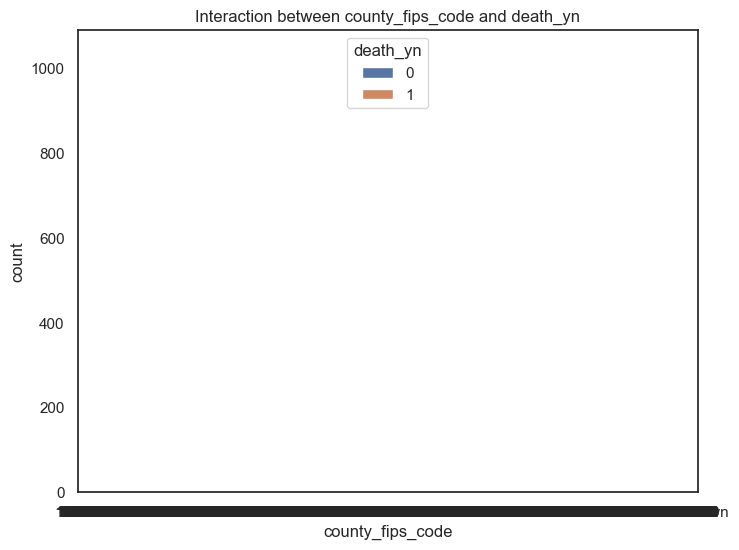

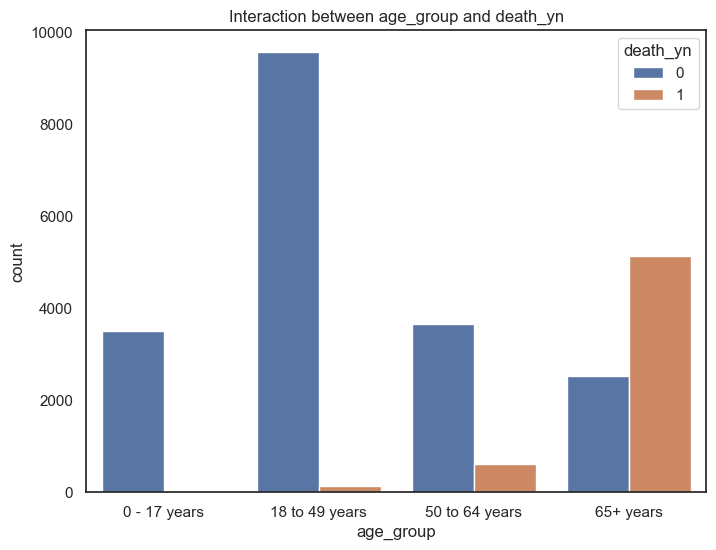

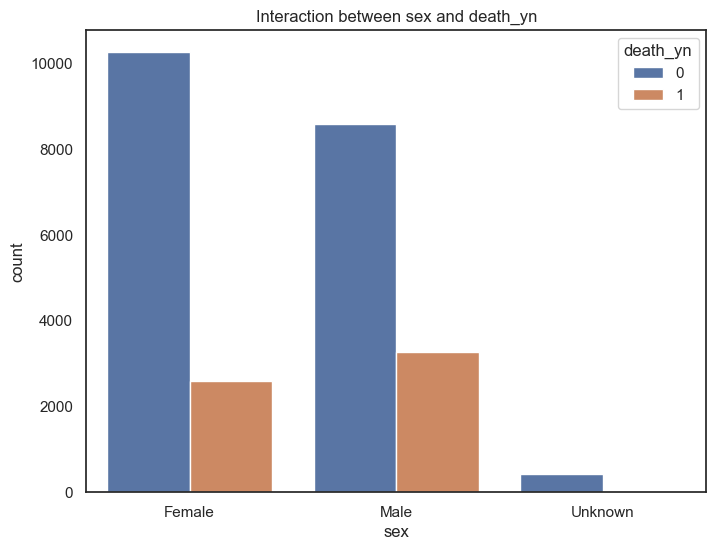

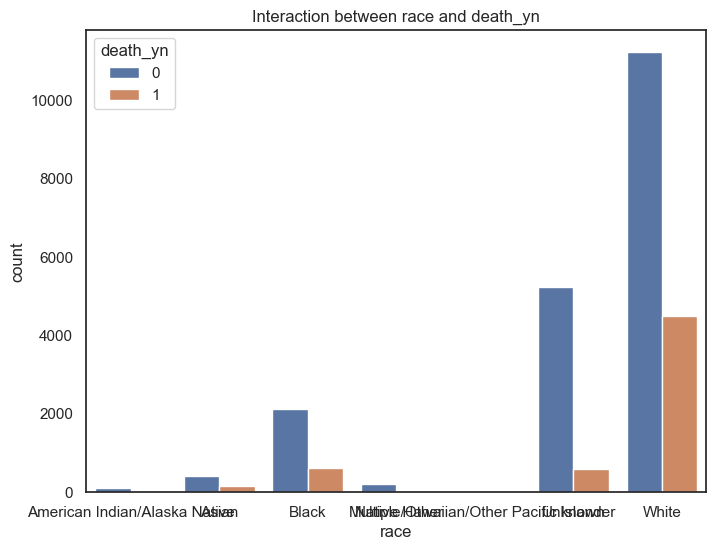

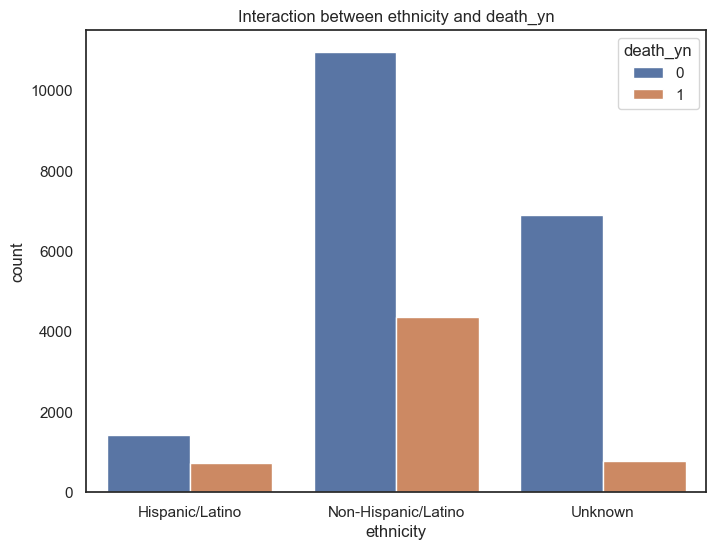

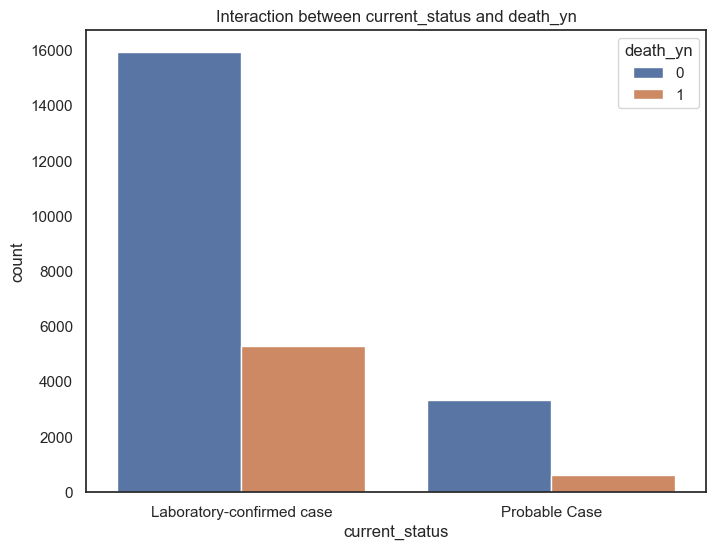

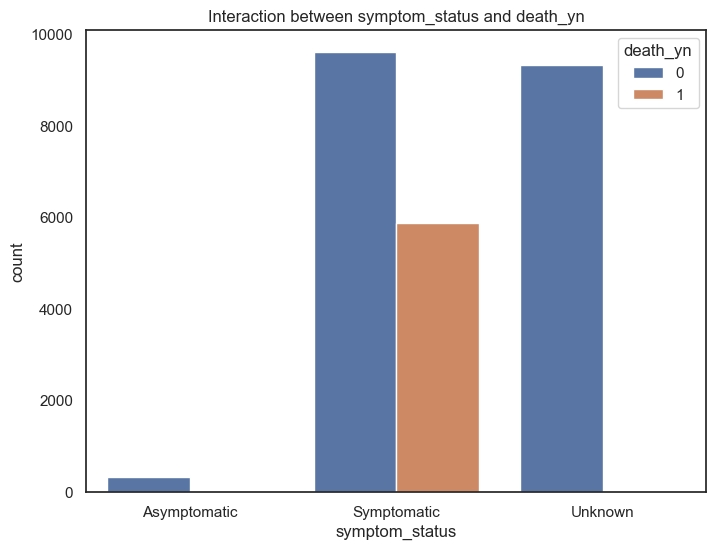

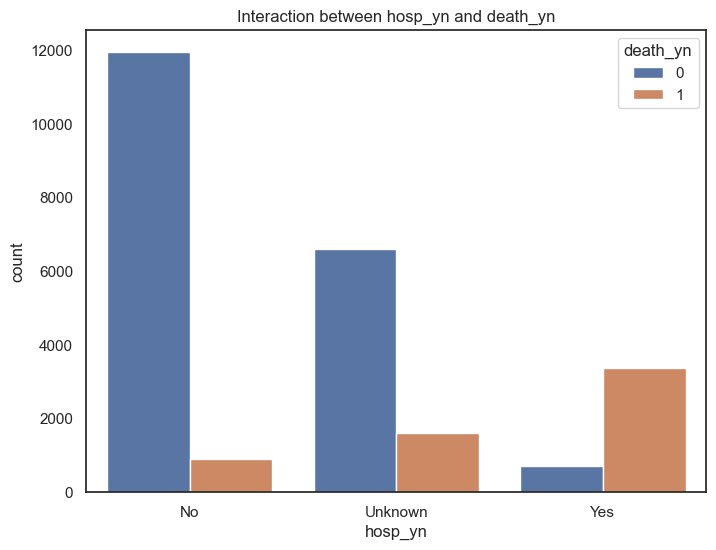

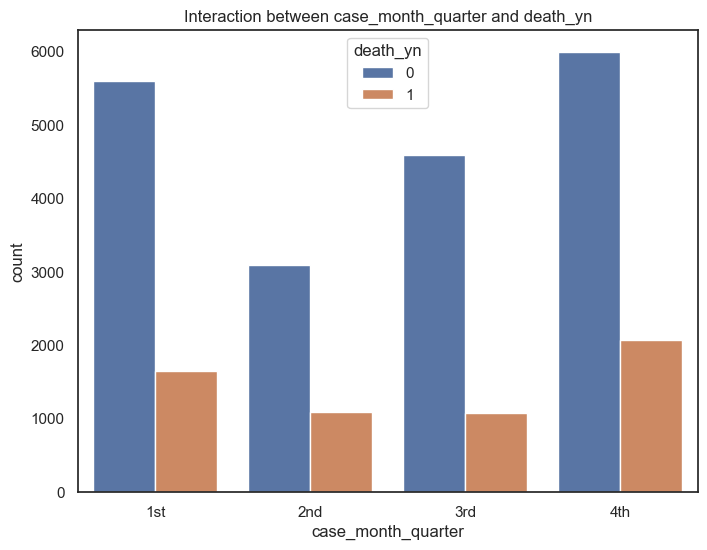

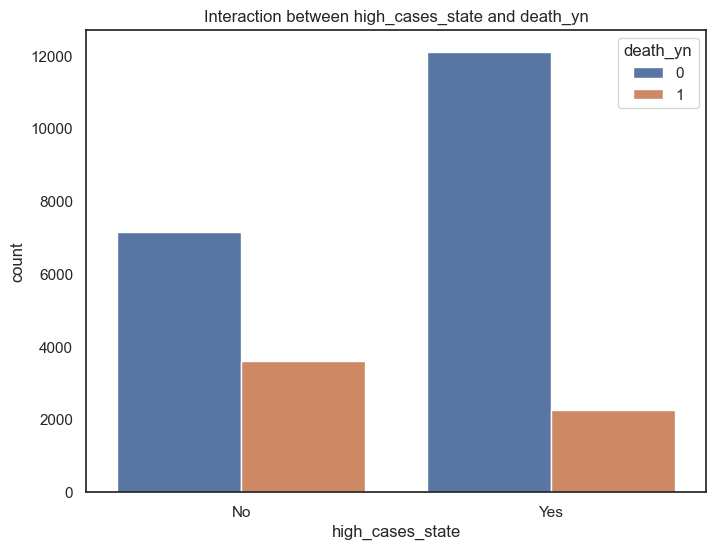

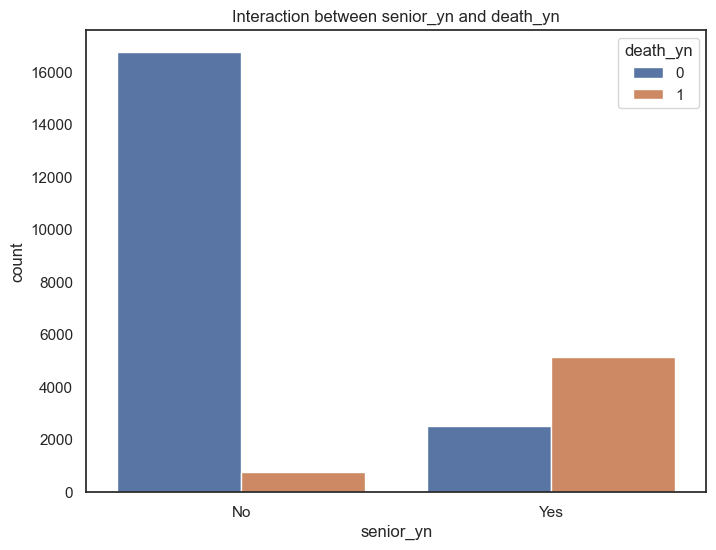

In [157]:
# we will create temp dataframe for these plots, mergeing X_train and y_train
df_temp= pd.concat([X_train, y_train], axis=1)

# Target feature column
target_column = 'death_yn'

# Plot the interaction between categorical features and the target feature
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, hue=target_column, data=df_temp)
    plt.title(f'Interaction between {column} and {target_column}')
    plt.show()


In [158]:
target_column = 'death_yn'

for column in categorical_columns:
    frequency_table = df_temp.groupby([column, target_column]).size().unstack()
    print(f'Frequency table for {column} and {target_column}:')
    print(frequency_table)
    print('\n')

Frequency table for case_month and death_yn:
death_yn       0    1
case_month           
2020-01        1    3
2020-02        0    1
2020-03      110  259
2020-04      232  637
2020-05      215  214
2020-06      330  104
2020-07      465  200
2020-08      334  135
2020-09      335   79
2020-10      574  186
2020-11     1149  519
2020-12     1236  803
2021-01     1211  534
2021-02      528  112
2021-03      528   52
2021-04      503   53
2021-05      230   16
2021-06      115    6
2021-07      367   92
2021-08      910  298
2021-09      848  193
2021-10      608   97
2021-11      660  159
2021-12     1425  293
2022-01     2588  611
2022-02      486   69
2022-03      147    6
2022-04      317    6
2022-05      671   22
2022-06      478   29
2022-07      568   43
2022-08      463   22
2022-09      299   16
2022-10      242   11
2022-11       98    1


Frequency table for res_state and death_yn:
death_yn      0    1
res_state           
AK            6    1
AL           70   58
AR         

Analysis:

case_month: We can see that the number of cases and deaths vary over time. There are certain months with higher numbers of cases and deaths, such as December 2020, January 2021, and January 2022. This suggests that the month of the case might be a relevant feature for predicting death outcomes.

res_state: The frequency of cases and deaths varies by state. Some states like CA, FL, IN, NC, NJ, NY, and OH have higher numbers of both cases and deaths. This suggests that the state of residence might be a useful feature for predicting death outcomes.

state_fips_code: This feature seems to be very similar to res_state since the FIPS code is just another way of representing the state. The observations made for res_state also apply to state_fips_code.

county_fips_code: With 1268 unique county FIPS codes, this feature might be too granular for making meaningful predictions. It could potentially lead to overfitting if used in a model. However, you can still try using it in your model and see if it provides any improvement in prediction performance.

age_group: There is a clear difference in death rates among the different age groups. The highest death rate is observed in the "65+ years" age group, while the lowest is in the "0 - 17 years" age group. This indicates that age_group is a strong predictor of the target feature death_yn.

sex: There is a noticeable difference in death rates between males and females. Males have a higher death rate than females. This suggests that sex might be a useful feature for predicting death outcomes.

race: The death rates vary across different racial groups, with the highest death rate observed in the White racial group. This feature might help in predicting the target feature death_yn.

ethnicity: There is a difference in death rates between Hispanic/Latino and Non-Hispanic/Latino ethnicities, with Non-Hispanic/Latino having a higher death rate. This suggests that ethnicity might be a useful feature for predicting death outcomes.

exposure_yn: Most of the data is missing for this feature, making it less informative for predicting the target feature death_yn.

current_status: There is a difference in death rates between laboratory-confirmed cases and probable cases, with laboratory-confirmed cases having a higher death rate. This suggests that current_status might be a useful feature for predicting death outcomes.

symptom_status: There is a difference in death rates across different symptom statuses, with symptomatic individuals having a higher death rate. This suggests that symptom_status might be a useful feature for predicting death outcomes.

hosp_yn: There is a significant difference in death rates among individuals who were hospitalized and those who were not. This indicates that hosp_yn is a strong predictor of the target feature death_yn.

icu_yn: There is a difference in death rates among individuals who were admitted to the ICU and those who were not. This indicates that icu_yn might be a useful feature for predicting the target feature death_yn.

underlying_conditions_yn: There is a significant difference in death rates among individuals with and without underlying conditions. This indicates that underlying_conditions_yn is a strong predictor of the target feature death_yn.

### 1.2.4 Summary & Drop Features

1. From Continuous vs Target plots (1.2.2) we identified the case_positive_specimen_interval column to drop

now we can drop it

In [159]:
# before dropping make copy of original
df_rev1 = df.copy()
# drop low value features
df_rev1.drop('case_positive_specimen_interval', 1, inplace=True)
print('\nRemaining columns:', df_rev1.columns)
print('\nNew shape:', df_rev1.shape)



Remaining columns: Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'current_status', 'symptom_status', 'hosp_yn', 'death_yn',
       'case_month_quarter', 'high_cases_state', 'senior_yn'],
      dtype='object')

New shape: (35932, 16)


/var/folders/55/shjzwzfd201dbvts5qjkvwhh0000gn/T/ipykernel_87597/1388950905.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_rev1.drop('case_positive_specimen_interval', 1, inplace=True)


2. From the analysis above, we don't need to drop any Categorical vs Target feature

## 1.4 Prepare dataset for modeling
Now we have picked our descriptive features for the whole dataset, a number of additional steps will need to be taken to prepare the dataset for modeling 
- We will now convert the categorical variables into dummies variable to allow modeling
- We will then remove the redundant dummies which contain no additional information
- We will then set up the train test split again based on the dataset with the dummies included

In [160]:
df_rev1 = df.copy()
# set up dummies features
df_rev1 = pd.get_dummies(df_rev1)
df_rev1.dtypes

case_positive_specimen_interval    int64
death_yn                           int64
case_month_2020-01                 uint8
case_month_2020-02                 uint8
case_month_2020-03                 uint8
                                   ...  
case_month_quarter_4th             uint8
high_cases_state_No                uint8
high_cases_state_Yes               uint8
senior_yn_No                       uint8
senior_yn_Yes                      uint8
Length: 2416, dtype: object

#### Continuous columns are:
- None

#### Categorical columns are:

In [161]:
categorical_columns = df_rev1.select_dtypes(include=['uint8']).columns.tolist()
categorical_columns


['case_month_2020-01',
 'case_month_2020-02',
 'case_month_2020-03',
 'case_month_2020-04',
 'case_month_2020-05',
 'case_month_2020-06',
 'case_month_2020-07',
 'case_month_2020-08',
 'case_month_2020-09',
 'case_month_2020-10',
 'case_month_2020-11',
 'case_month_2020-12',
 'case_month_2021-01',
 'case_month_2021-02',
 'case_month_2021-03',
 'case_month_2021-04',
 'case_month_2021-05',
 'case_month_2021-06',
 'case_month_2021-07',
 'case_month_2021-08',
 'case_month_2021-09',
 'case_month_2021-10',
 'case_month_2021-11',
 'case_month_2021-12',
 'case_month_2022-01',
 'case_month_2022-02',
 'case_month_2022-03',
 'case_month_2022-04',
 'case_month_2022-05',
 'case_month_2022-06',
 'case_month_2022-07',
 'case_month_2022-08',
 'case_month_2022-09',
 'case_month_2022-10',
 'case_month_2022-11',
 'res_state_AK',
 'res_state_AL',
 'res_state_AR',
 'res_state_AZ',
 'res_state_CA',
 'res_state_CO',
 'res_state_CT',
 'res_state_DC',
 'res_state_FL',
 'res_state_GA',
 'res_state_GU',
 'res_st

#### Total features are:

In [162]:
features = continuous_columns + categorical_columns
features


Index(['case_positive_specimen_intervalcase_month_2020-01',
       'case_positive_specimen_intervalcase_month_2020-02',
       'case_positive_specimen_intervalcase_month_2020-03',
       'case_positive_specimen_intervalcase_month_2020-04',
       'case_positive_specimen_intervalcase_month_2020-05',
       'case_positive_specimen_intervalcase_month_2020-06',
       'case_positive_specimen_intervalcase_month_2020-07',
       'case_positive_specimen_intervalcase_month_2020-08',
       'case_positive_specimen_intervalcase_month_2020-09',
       'case_positive_specimen_intervalcase_month_2020-10',
       ...
       'case_positive_specimen_intervalhosp_yn_Unknown',
       'case_positive_specimen_intervalhosp_yn_Yes',
       'case_positive_specimen_intervalcase_month_quarter_1st',
       'case_positive_specimen_intervalcase_month_quarter_2nd',
       'case_positive_specimen_intervalcase_month_quarter_3rd',
       'case_positive_specimen_intervalcase_month_quarter_4th',
       'case_positive_s

### Setting up the train/test split
- This is based on the dataset with dummy values
- The Target is stored in dataframe "y"
- The remaining features are stored in dataframe "X"
- Both are split into training and test subsets

In [163]:
# y is the target
y = df_rev1["death_yn"]
# X is everything else
X = df_rev1.drop(labels=["death_yn"], axis=1)
# Split the dataset into two datasets: 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, test_size=0.3)

print("original range is: ", df_rev1.shape[0])
print(f"training range (70%):\t rows 0 to {round(X_train.shape[0])}")
print(
    f"test range (30%): \t rows {round(X_train.shape[0])} to {round(X_train.shape[0]) + X_test.shape[0]}")


original range is:  35932
training range (70%):	 rows 0 to 25152
test range (30%): 	 rows 25152 to 35932


In [164]:
print("\nDescriptive features in X:\n", X_train.head(5))
print("\nTarget feature in y:\n", y_train.head(5))



Descriptive features in X:
        case_positive_specimen_interval  case_month_2020-01  \
1186                                 0                   0   
16293                                0                   0   
26350                                0                   0   
26499                                0                   0   
6636                                 0                   0   

       case_month_2020-02  case_month_2020-03  case_month_2020-04  \
1186                    0                   0                   0   
16293                   0                   0                   0   
26350                   0                   0                   0   
26499                   0                   0                   0   
6636                    0                   0                   0   

       case_month_2020-05  case_month_2020-06  case_month_2020-07  \
1186                    0                   0                   0   
16293                   0                   0

#### Reset the indexes of the training and test splits
- We can see from the X_train printout below that the indexes are no longer consecutive
- This is the same for y_train, X_test, y_test
- This will need to be dealt with next as it will effect merging of dataframes in the coming sections

In [165]:
X_train.head(5)

,case_positive_specimen_interval,case_month_2020-01,case_month_2020-02,case_month_2020-03,case_month_2020-04,case_month_2020-05,case_month_2020-06,case_month_2020-07,case_month_2020-08,case_month_2020-09,...,hosp_yn_Unknown,hosp_yn_Yes,case_month_quarter_1st,case_month_quarter_2nd,case_month_quarter_3rd,case_month_quarter_4th,high_cases_state_No,high_cases_state_Yes,senior_yn_No,senior_yn_Yes
1186,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
16293,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
26350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
26499,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


We will now reset the index of all training and test dataframes

In [166]:
# need to reset the index to allow contatenation with predicted values otherwise not joining on same index...
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
X_train.head(5)


,case_positive_specimen_interval,case_month_2020-01,case_month_2020-02,case_month_2020-03,case_month_2020-04,case_month_2020-05,case_month_2020-06,case_month_2020-07,case_month_2020-08,case_month_2020-09,...,hosp_yn_Unknown,hosp_yn_Yes,case_month_quarter_1st,case_month_quarter_2nd,case_month_quarter_3rd,case_month_quarter_4th,high_cases_state_No,high_cases_state_Yes,senior_yn_No,senior_yn_Yes
0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


The datasets are now ready for modeling

## (2) Linear Regression Model
#### 2.1 Train a linear regression model using only the descriptive features selected from part 1 above

## (3) Logistic Regression   

## (4) Random Forest Model

### 4.1 Train a random forest model using only the descriptive features selected from part 1 above 
- A random forest model will now be trained on our test data. 
- We use the RandomForestClassifier() function. 
- The random state will be set to 1 to allow the results to be repeated

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Train RF with 100 trees
rfc = RandomForestClassifier(
    n_estimators=100, max_features='sqrt', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)


RandomForestClassifier(oob_score=True, random_state=1)

### 4.2 Understanding the Random Forest model
We will now try to understand how this random forest model works
- We will first start by trying to understand a decision tree 
- A random forest is made up of an ensemble/collection of decision trees
- Decision tree
    - A decision tree is a set of if-then-else rules based on splitting the data based on specific features
    - The decision on which feature to split on is based on the information gain (Gini index). 
    - The tree will always split on the feature that gives the highest information gain
    - The feature with the highest information gain will sit at the root of each decision tree
    - Each decision tree will be a single prediction
- Random Forest 
    - The random forest is made up of a number of decision trees
    - The output of the random forest is base on the majority output of all decision trees combined
    - This gives reliable results but can be hard to interpret
    - The random forest will keep track of the importance of features in terms of information gain, which we will see
    
We will now look at an example of a single decision tree to get a better understanding

####  4.2.1  Train Decision tree
We will train 2 decision trees, with the same test data 
- One with max_depth=4 and the other max_depth=10
- Max depth determines how deep a decision tree can go before it must give an answer

In [168]:
from sklearn.tree import DecisionTreeClassifier
dtc4 = DecisionTreeClassifier(max_depth=4, random_state=1)
dtc10 = DecisionTreeClassifier(max_depth=10, random_state=1)
dtc4.fit(X_train, y_train)
dtc10.fit(X_train, y_train)
print("Max depth 4: \n",dtc4)
print("Max depth 10: \n",dtc10)

Max depth 4: 
 DecisionTreeClassifier(max_depth=4, random_state=1)
Max depth 10: 
 DecisionTreeClassifier(max_depth=10, random_state=1)


####  4.2.2  Display Decision tree
We will create graph of each tree and store as an image

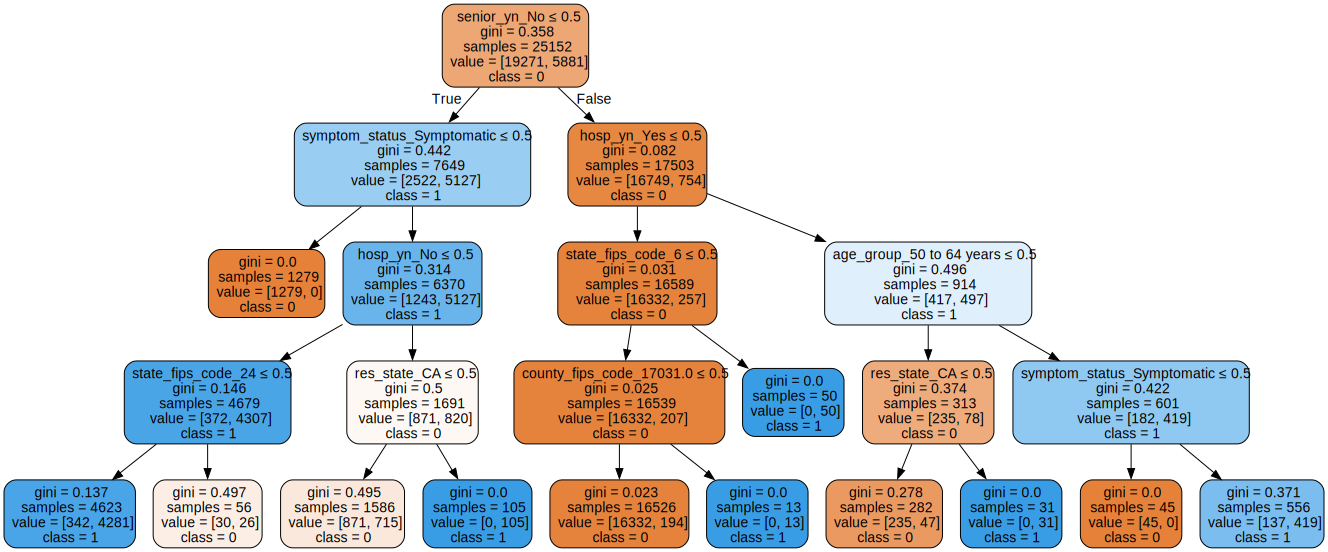

In [182]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree in DOT format
dot_data = export_graphviz(dtc4, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("dtc4_tree")
graph


We can see above the decision tree with max_depth=4
- We can see the root is senior_yn_No at value 0.5 (it indicates the value between yes and no)
- For each split the the model are always at value 0.5 since we have converted all the features into 1 and 0
- This continues until it reaches a leaf node where the data cannot be split anymore
- The output of this is the prediction
- We can see one path below is resolved in 2 branches
    - senior_yn_No <= 0.5 -> symptom_status_Symptomatic <= 0.5 -> Resolved to TRUE
    - All other entries need additional branches to be resolved

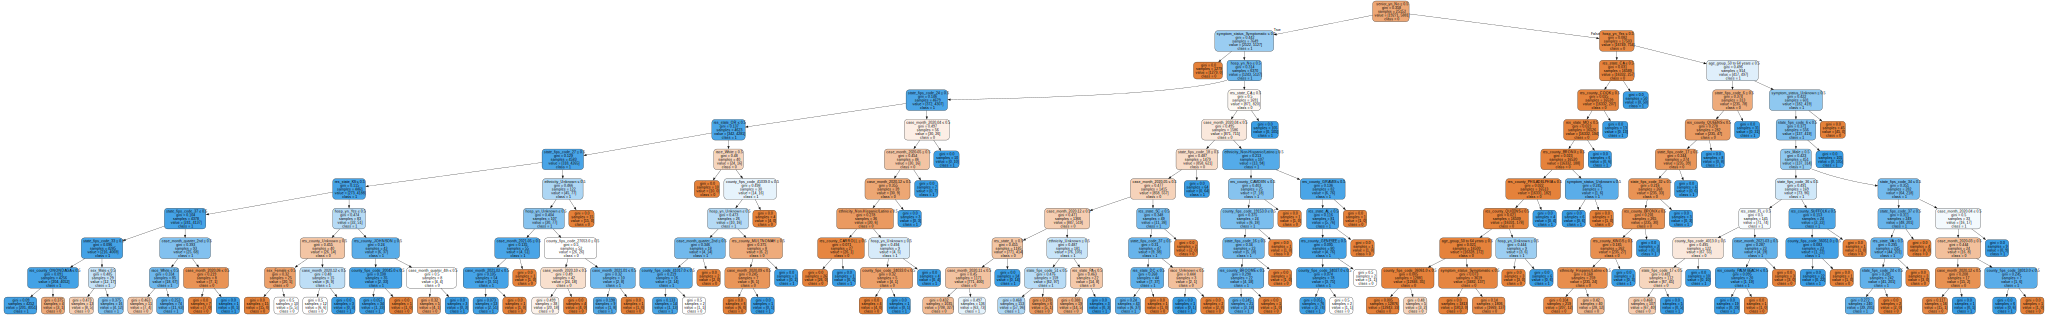

In [183]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree in DOT format
dot_data = export_graphviz(dtc10, out_file=None,
                           feature_names=X_train.columns,
                           class_names=['0', '1'],
                           filled=True, rounded=True,
                           special_characters=True)


# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("dtc10_tree")
graph

Viewing a decision tree with maxdepth=10 shows how complicated this model becomes 
- This is only one example of a decision tree. 
- A Random forests has 100 decision trees by default
- Each decision tree is given a slightly different view of the data

#### 4.2.3 Interpretation of the random forest model
As mentioned above the random forest will keep track of the importance of features
- We can see from the dataframe below the results of this feature importance ranking
- The more important features are the features that the random forest has identified as having higher information gain
- This list is the combined result of the 100 decision trees that make up the random forest model
- This feature ranking will help us in our optimisation process going forward
    - What are the best features to keep?
    - What features can be safely dropped without loosing information?

In [170]:
importance = pd.DataFrame(
    {'feature': X_train.columns, 'importance': rfc.feature_importances_})
importance.sort_values('importance', ascending=False)


,feature,importance
2385,age_group_65+ years,0.111184
2414,senior_yn_Yes,0.095381
2413,senior_yn_No,0.087839
2406,hosp_yn_Yes,0.080811
2403,symptom_status_Unknown,0.054012
...,...,...
1821,county_fips_code_39127.0,0.000000
741,res_county_OGEMAW,0.000000
745,res_county_OKMULGEE,0.000000
1798,county_fips_code_39073.0,0.000000


We can see from the list above that many of the features provide little to no information gain. The most importance feature is age_group_65+ years.

### 4.4 Printing 100 predicted target features and evaluate the prediction 
- Here we will print the predicted target feature value for the first 100 training examples. 

In [171]:
# Predicted class labels for all examples,
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_train = rfc.predict(X_train)
df_true_vs_rfc_predicted = pd.DataFrame(
    {'ActualClass': y_train, 'PredictedClass': rfc_predictions_train})
df_true_vs_rfc_predicted.head(100)


,ActualClass,PredictedClass
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,0,0


### 4.5 Evaluation metrics based on training data
- We will print the classification evaluation measures computed on the training set (e.g. Accuracy, Confusion matrix, Precision, Recall, F1)
- We will discuss finding based on these measures

In [172]:
from sklearn import metrics

print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(
    y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(
    y_train, rfc_predictions_train))


==================== Train Data =======================
Accuracy:  0.9972169211195929
Confusion matrix: 
 [[19232    39]
 [   31  5850]]
Classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     19271
           1       0.99      0.99      0.99      5881

    accuracy                           1.00     25152
   macro avg       1.00      1.00      1.00     25152
weighted avg       1.00      1.00      1.00     25152



Interpretation of results
- The model has learned the results. This is clearly overfitting

### 4.6 Evaluate the model using the hold-out (30% examples) test set
- These results from the test data will be compared the results from the training data.
- In addition they will be compared to the results from a cross-validated model (i.e., a new model trained and evaluated using cross-validation on the full dataset).

Printing Actual death_ye vs predicted based on test data

In [173]:
# Predicted class labels for all examples,
# using the trained model, on in-sample data (same sample used for training and test)
rfc_predictions_test = rfc.predict(X_test)
df_true_vs_rfc_predicted_test = pd.DataFrame(
    {'ActualClass': y_test, 'PredictedClass': rfc_predictions_test})
df_true_vs_rfc_predicted_test.head(20)


,ActualClass,PredictedClass
0,1,1
1,1,1
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


Evaluation metrics based on test data

In [174]:
print("==================== Test Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_test, rfc_predictions_test))
print("Confusion matrix: \n", metrics.confusion_matrix(
    y_test, rfc_predictions_test))
print("Classification report:\n ", metrics.classification_report(
    y_test, rfc_predictions_test))
print("==================== Train Data =======================")
print("Accuracy: ", metrics.accuracy_score(y_train, rfc_predictions_train))
print("Confusion matrix: \n", metrics.confusion_matrix(
    y_train, rfc_predictions_train))
print("Classification report:\n ", metrics.classification_report(
    y_train, rfc_predictions_train))
print("======================================================")


==================== Test Data =======================
Accuracy:  0.9668831168831169
Confusion matrix: 
 [[8030  195]
 [ 162 2393]]
Classification report:
                precision    recall  f1-score   support

           0       0.98      0.98      0.98      8225
           1       0.92      0.94      0.93      2555

    accuracy                           0.97     10780
   macro avg       0.95      0.96      0.95     10780
weighted avg       0.97      0.97      0.97     10780

==================== Train Data =======================
Accuracy:  0.9972169211195929
Confusion matrix: 
 [[19232    39]
 [   31  5850]]
Classification report:
                precision    recall  f1-score   support

           0       1.00      1.00      1.00     19271
           1       0.99      0.99      0.99      5881

    accuracy                           1.00     25152
   macro avg       1.00      1.00      1.00     25152
weighted avg       1.00      1.00      1.00     25152



Interpretation of test results and comparison with training results 
- The accuracy for the test is much lower as we are not testing the model with data it has not see before
- The scores seem reasonable and are in line with the other models test results

### 4.7 Cross validation
- We will preform cross validation and store the results in a dictionary for later use

In [175]:
from sklearn.model_selection import cross_val_score

def cross_val_RandomForest_DF(X,y, depth=None, estimators=100):
    """Function to perform cross validation and store results 
    in dataframe. Cross validation looks at accuracy, precision, 
    recall, f1. Returns a dataframe with results"""

    # store results in dict
    RandomForestResults = {}
    # metrics to test against
    test_metrics = ['accuracy','precision','recall', 'f1']

    for metric in test_metrics:
        # generate test results
        result = cross_val_score(RandomForestClassifier(n_estimators=estimators, max_features='auto', oob_score=True, random_state=1, max_depth=depth), X, y, scoring=metric, cv=10)
        # store result in dict
        RandomForestResults[metric] = result.mean()
    
    # create dataframe with results
    RandomForestDF = pd.DataFrame.from_dict(RandomForestResults, orient='index', columns=['Random_Forests'])

    return RandomForestDF

##### The results for Random Forests are summarized below

In [185]:
RandomForestDF = cross_val_RandomForest_DF(X, y)
print(f"Mean results from 10 fold cross validation are:")
RandomForestDF


/Users/shizuku/opt/anaconda3/envs/comp30830/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shizuku/opt/anaconda3/envs/comp30830/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/shizuku/opt/anaconda3/envs/comp30830/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicit

The results above are inline with expectation
- The accuracy is the same
- The precision, recall and f1 are all a little lower but in line with the other models

### 4.8 Out of bag accuracy
- This is the out of bag error estimate 
- It is an internal error estimate of a random forest as it is being constructed.
- It is used as an additional measure and should be line with the cross validation results
- This is generally expected to be the lowest

In [ ]:
# compute the out-of-bag classification accuracy
rfc.oob_score_a

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_a'

This value is in line with the Cross validation results above

## 5 Improving Predictive Models

### 5.1 Which model of the ones trained above performs better at predicting the target feature? 
- All models preform almost identical on the test dataset +/- 1%
- Summary of the results so far can be seen below (based on predicting good outcome (RiskEstimate=0))
- Note these results are for a subset of the original features i.e. In part 1 we dropped many of the low correlation features
    - In part 5.3 we will review the impact to the decisions taken in part 1

In [ ]:
ResultsDF = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF


### 5.2 Is the model more accurate than a simple model that always predicts the majority class
- We will compare our results above to a simple model which predicts for the majority class
- First we will get the breakdown of the test dataset and see which is the majority class

In [ ]:
yes_count = y_test[y_test == 1].count()
no_count = y_test[y_test == 0].count()
total = yes_count + no_count
print(f'From original dataset: \t\tCount {total}')
print(
    f'Total number never delinquent:\t {yes_count}\t{round(yes_count/len(y_test)*100,2)}%')
print(
    f'Total number delinquent:\t {no_count}\t{round(no_count/len(y_test)*100,2)}%')


- We can see the majority class is 0 or RiskOutcome=Bad 
- We will now generate scores for predicting the majority class

In [ ]:
# generate array of 10780 zeros (length of test dataset)
majority = np.zeros(10780)
# create dataframe
df_majorityClass = pd.DataFrame(majority, columns=['prediction'])
# calculate scores of simple predictin vs actual
print("Accuracy: ", metrics.accuracy_score(y_test, df_majorityClass))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, df_majorityClass))
print("Classification report:\n ",
      metrics.classification_report(y_test, df_majorityClass))


- For predicting good outcome the simple model fails completely as expected
- For predicting the bad outcome the simple model fares much better but still worse than all the other models outlined above
    - The precision is the same as the accuracy in this case - i.e. how good is it at predicting 0
    - The recall is 100% as all of the actual 0 values were predicted 0
    - The f1 is between the precision and recall as it is a weighted average of the two

### 5.3 Compare Model performance using different feature subsets 
#### 5.3.1 All features
- We will now repeat the tests using all features 
- First we set up the dataframe using the original features

In [ ]:
# dataframe with all features = original dataframe
df_all = pd.get_dummies(df)
# set X,y
y = df_all["death_yn"]
X = df_all.drop(["death_yn"], 1)
print("number of features incl dummies: ", len(X.columns))


With the dataframe now setup we will generate new set of results based on all the features
- This operation is simplified as we have set up functions in part 2,3,4 to allow cross validated scores to be returned in dataframes 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz

import graphviz
from graphviz import Source

# calculate Linear regression, logistic regression, random forest results again using all features
linRegDF = cross_val_LinReg_DF(X, y)
logRegDF = cross_val_LogReg_DF(X, y)
RandomForestDF = cross_val_RandomForest_DF(X, y)
# merge all 3 models into dataframe
ResultsDF_allFeatures = pd.concat([linRegDF, logRegDF, RandomForestDF], axis=1)
ResultsDF_allFeatures


####  Comparison of all

In [ ]:
print("\nScores using all features: 28 features (0 features dropped)")
print("===================================================================")
print(ResultsDF_allFeatures)
print("\nScores using subset of features: 18 features (10 features dropped - from part 1)")
print("===================================================================")
print(ResultsDF)
print("\nScores using high Correlation features: 5 features (23 features dropped)")
print("===================================================================")
print(ResultsDF_HighCorrFeatures)
print("\nScores using optimum features: 10 features (18 features dropped)")
print("===================================================================")
print(ResultsDF_optimum_features)


### 5.6 Further work
Additional evaluation measures could be preformed on each model that were outside the scope of this homework
- Receiver Operating Characteristics (ROC) 
    - A Plot used to visualize how well our classifier is doing
    - Tells us how good the model is for distinguishing given classes
    - Plots False Positive Rate (FPR) against True Positive Rate (TPR)
- Area Under ROC Curve (AUC) 
    - Measures the quality of the ROC curve by calculating the total area under the ROC curve
    - The bigger the area covered, the better the model is at distinguishing the given classes

### 5.7 Summary
- 3 predictive models have been evaluated in this notebook, with all models preform similarly
- The majority of the features in the dataset have been found to have little impact on the target
- A number of optimisations have been made that have improved all models
- The biggest effect is finding the optimised list of features as this can be applied to all models
- The linear regression marginally preforms best but is not recommended as results could be skewed by valid outliers
- The logistic and random forest models preform almost the same +/-1% and both could be used. 
- The logistic model is more lightweight and will be faster to retain, however provides marginally lower accuracy.

#### Recommendations: 
1. Re-evaluate each model on the **whole** dataset
2. Use the additional evaluation measures outlined in 5.6